In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
%config IPCompleter.greedy=True 

In [4]:
#weather information dataframe
df_weather_2016 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\fellowship\fellowship\weather_2016.csv")

In [5]:
#NDVI values dataframe
df_2016 = pd.read_csv(r"C:\Users\i341657\OneDrive - SAP SE\Desktop\dataset_figueras_cloud_2016.csv",delimiter=';')

In [6]:
#Adding new column 'Month' to the dataframe
df_2016['Date'] = pd.to_datetime(df_2016['Date'])
df_2016['Month'] = df_2016['Date'].apply(lambda x: x.month)

#Creating new dataframe with only month and ndvi values
df_2016_new = df_2016[['NDVI_mean','Month']]

#Aggregating mean NDVI values by their month
df_2016_new = df_2016_new.groupby('Month').agg({ 'NDVI_mean':'mean'}).reset_index()

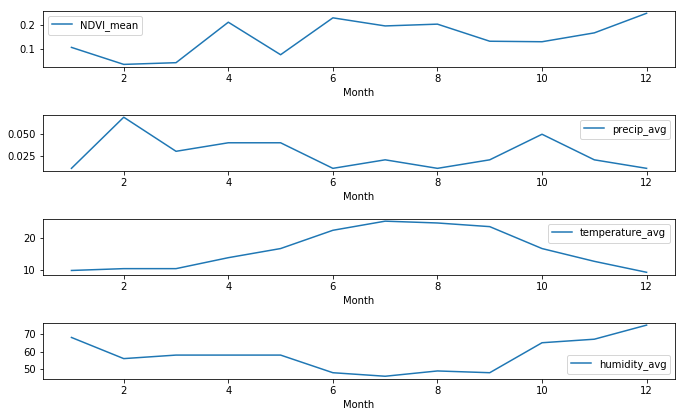

In [7]:
#Plot of weather and ndvi values
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.tight_layout()
df_2016_new.plot(ax=axes[0],x="Month", y="NDVI_mean",figsize=(10,6))
df_weather_2016.plot(ax=axes[1],x="Month", y="precip_avg",figsize=(10,6))
df_weather_2016['temperature_avg'] = df_weather_2016['temperature_avg'].apply(lambda x: (x-32)/1.8)
df_weather_2016.plot(ax=axes[2],x="Month", y="temperature_avg",figsize=(10,6))
df_weather_2016.plot(ax=axes[3],x="Month", y="humidity_avg",figsize=(10,6))

## Correlation between precipitation and ndvi

In [12]:
#Normalizing the values between (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df_weather_2016["precip_avg"].values.reshape(-1, 1))
print(scaler.data_min_,scaler.data_max_)
normalized = scaler.transform(df_weather_2016["precip_avg"].values.reshape(-1, 1))
df_weather_2016["precip_avg_norm"] = normalized

distance, path = fastdtw(df_weather_2016[["Month","precip_avg_norm"]], df_2016_new[["Month","NDVI_mean"]], dist=euclidean)
print(distance)


[0.01] [0.07]
3.3676274505747488


# Correlation between temperature and ndvi

In [14]:
#Normalizing the values between (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df_weather_2016["temperature_avg"].values.reshape(-1, 1))
print(scaler.data_min_,scaler.data_max_)
normalized = scaler.transform(df_weather_2016["temperature_avg"].values.reshape(-1, 1))
df_weather_2016["temperature_avg_norm"] = normalized

distance, path = fastdtw(df_weather_2016[["Month","temperature_avg_norm"]], df_2016_new[["Month","NDVI_mean"]], dist=euclidean)
print(distance)

[9.44444444] [25.]
4.153248870531523


## Correlation between humidity and ndvi

In [15]:
#Normalizing the values between (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df_weather_2016["humidity_avg"].values.reshape(-1, 1))
print(scaler.data_min_,scaler.data_max_)
normalized = scaler.transform(df_weather_2016["humidity_avg"].values.reshape(-1, 1))
df_weather_2016["humidity_avg_norm"] = normalized

distance, path = fastdtw(df_weather_2016[["Month","humidity_avg_norm"]], df_2016_new[["Month","NDVI_mean"]], dist=euclidean)
print(distance)

[46.] [75.]
4.23537319357836


C:\Users\i341657\AppData\Local\Continuum\miniconda3\envs\scipygeo18\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
